<a href="https://colab.research.google.com/github/Carobogasgol/ml_labs_2025/blob/main/lab3/lab3_ml_spring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Содержит показания газового мультисенсорного устройства, установленного на месторождении в итальянском городе. Ежечасно
Регистрируются средние значения показаний вместе с эталонными концентрациями газа от сертифицированного анализатора.
Информация о наборе данных:
Набор данных содержит 9358 экземпляров усредненных по часам откликов от массива из 5 химических датчиков оксида металла
встроен в химическое мультисенсорное устройство для контроля качества воздуха. Аппарат располагался на поле в значительно
загрязнена зона на улице, на ровной дороге,вблизи итальянского города. Данные были записаны с марта 2004 по февраль 2005 года (один
год), что представляет собой самые продолжительные записи, находящиеся в свободном доступе, о химических датчиках качества воздуха, установленных на местах
ответы. Данные о среднечасовых концентрациях CO, неметановых углеводородов, бензола, общего количества
Оксидов азота (NOx) и диоксида азота (NO2) были получены с помощью расположенного рядом эталонного сертифицированного анализатора.
Имеются свидетельства перекрестной чувствительности, а также смещения концепции и датчиков, которые в конечном итоге влияют на оценку концентрации датчиков
возможности. Отсутствующие значения помечены значением -200.

Атрибутивная информация:
0 Дата (ДД/ММ/ГГГГ)

1 Время (ЧЧ.ММ.СС)

2 Истинная усредненная за час концентрация CO в мг / м ^ 3 (эталонный анализатор)

3 Усредненная за час реакция датчика PT08.S1 (оксид олова) (номинально ориентированная на CO)

4 Истинная усредненная за час общая концентрация неметановых углеводородов в мкг /м^3 (эталонный анализатор)

5 Истинная усредненная за час концентрация бензола в мкг /м ^3 (эталонный анализатор)

6 PT08.S2 (titania) усредненный по часам отклик датчика (номинально ориентированный на NMHC)

7 Истинная усредненная по часам концентрация NOx в ppb (эталонный анализатор)

8 PT08.S3 (оксид вольфрама) усредненный по часам отклик датчика (номинально ориентированный на NOx)

9 Истинная усредненная по часам концентрация NO2 в мкг / м ^3 (эталонный анализатор)

10 PT08.S4 (оксид вольфрама) усредненный по часам отклик датчика (номинально нацелен на NO2)

11 PT08.S5 (оксид индия) усредненный по часам отклик датчика (номинально нацелен на O3)

12 Температура в °C

13 Относительная влажность (%)
14 Абсолютная влажность

In [126]:
import pandas as pd
from google.colab import files
uploaded = files.upload()  # Откроется окно для выбора файла

df = pd.read_csv('AirQualityUCI.csv', sep=';', header=0)
df = df.drop(['Unnamed: 15', 'Unnamed: 16'], axis=1)
df.replace(-200, pd.NA, inplace=True)  # Замена пропусков
df.dropna(inplace=True)

df.shape

Saving AirQualityUCI.csv to AirQualityUCI (8).csv


(851, 15)

In [127]:
df.head(3)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578"
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255"
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502"


За таргет имеет смысл взять колонку CO, потому что предсказывать его значение может быть полезно для естественнонаучных дисциплин(например предсказание глобального потепления)

In [128]:
df = df.drop_duplicates()
df.shape

(851, 15)

<ipython-input-129-97974a50eeca>:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_numeric = df_numeric.replace(',', '.', regex=True).astype(float)


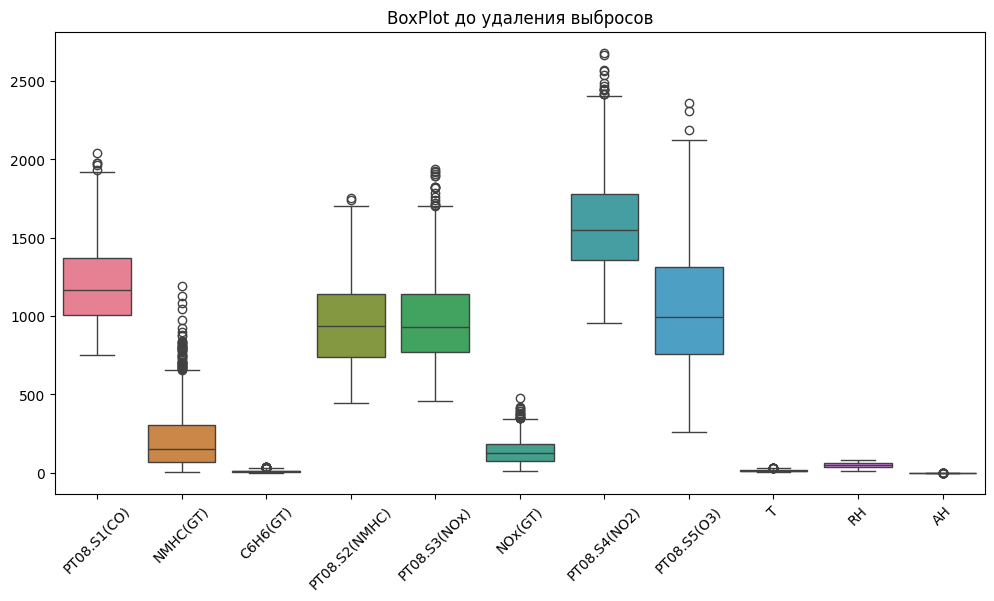

In [129]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NOx(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH']
df_numeric = df[numeric_cols]
df_numeric = df_numeric.replace(',', '.', regex=True).astype(float)
df['CO(GT)'] = df['CO(GT)'].replace(',', '.', regex=True).astype(float)
plt.figure(figsize=(12, 6))
sns.boxplot(df_numeric)
plt.title('BoxPlot до удаления выбросов')
plt.xticks(rotation=45)
plt.show()

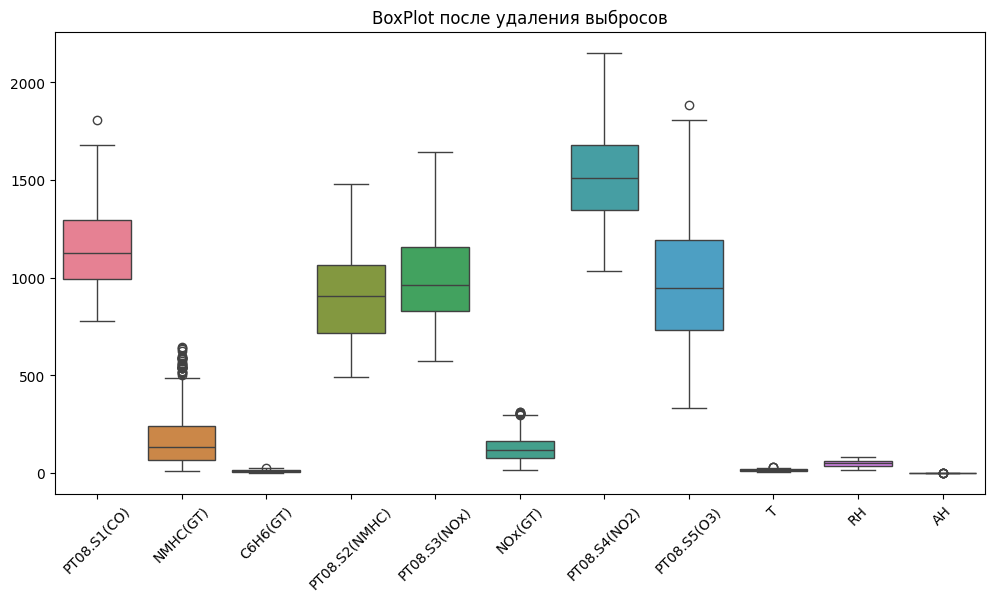

In [130]:
def remove_outliers(df, columns):
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

df_clean = remove_outliers(df_numeric, numeric_cols)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_clean)
plt.title('BoxPlot после удаления выбросов')
plt.xticks(rotation=45)
plt.show()

Строим матрицу корелляций и находим наиболее скореллированные признаки

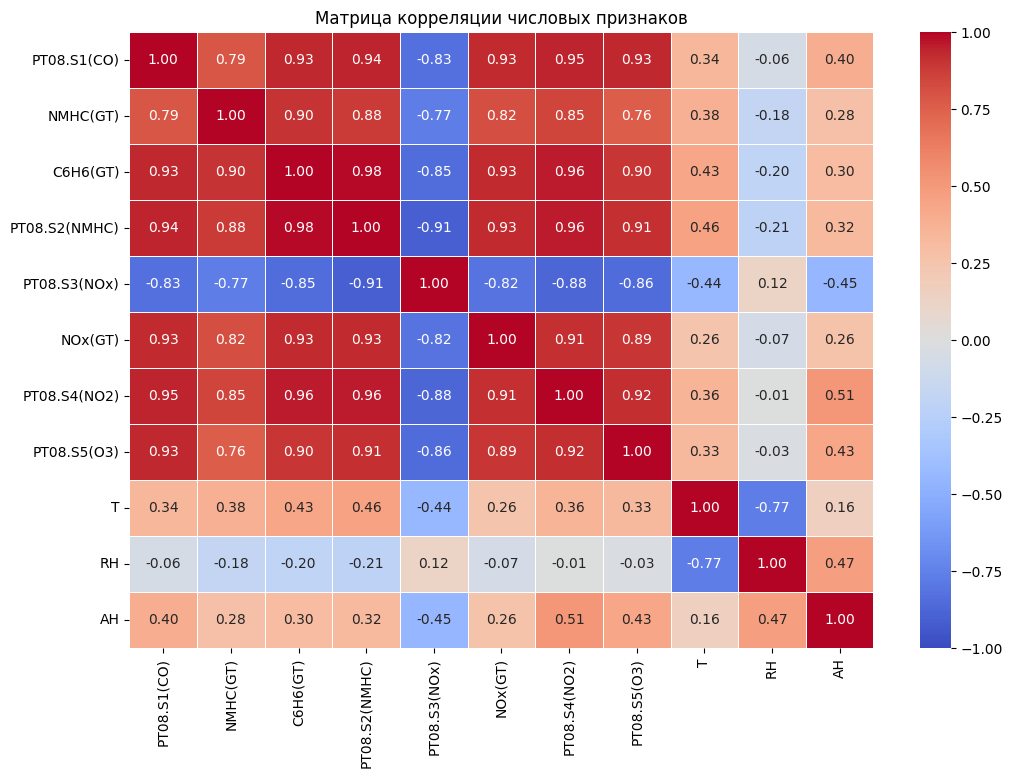

In [131]:
corr_matrix = df_numeric.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            vmin=-1,
            vmax=1,
            linewidths=0.5)
plt.title('Матрица корреляции числовых признаков')
plt.show()

In [132]:
target = 'CO(GT)'
features = [col for col in corr_matrix.columns if col != target]

high_corr_features = {}

for feature in features:
    correlated = corr_matrix[(corr_matrix[feature].abs() > 0.5) & (corr_matrix.index != feature)].index.tolist()
    if correlated:
        high_corr_features[feature] = correlated

print("Признаки с корреляцией > |0.5| (исключая целевую колонку):")
for feature, correlated in high_corr_features.items():
    print(f"{feature}: {correlated}")

Признаки с корреляцией > |0.5| (исключая целевую колонку):
PT08.S1(CO): ['NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NOx(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
NMHC(GT): ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NOx(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
C6H6(GT): ['PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NOx(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
PT08.S2(NMHC): ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S3(NOx)', 'NOx(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
PT08.S3(NOx): ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
NOx(GT): ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'PT08.S4(NO2)', 'PT08.S5(O3)']
PT08.S4(NO2): ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NOx(GT)', 'PT08.S5(O3)', 'AH']
PT08.S5(O3): ['PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'PT08.S3(NOx)', 'NOx(GT)', 'PT08.S4(NO2)']
T: ['RH']
RH: ['T']
AH: ['PT08.

In [133]:
corr_counts = {feature: len(correlated) for feature, correlated in high_corr_features.items()}
sorted_features = sorted(corr_counts.items(), key=lambda x: x[1], reverse=True)

print("\nПризнаки, коррелирующие с наибольшим числом других:")
for feature, count in sorted_features:
    print(f"{feature}: {count} связей")


Признаки, коррелирующие с наибольшим числом других:
PT08.S4(NO2): 8 связей
PT08.S1(CO): 7 связей
NMHC(GT): 7 связей
C6H6(GT): 7 связей
PT08.S2(NMHC): 7 связей
PT08.S3(NOx): 7 связей
NOx(GT): 7 связей
PT08.S5(O3): 7 связей
T: 1 связей
RH: 1 связей
AH: 1 связей


Анализируем колонки на наличие нулевых значений

In [134]:
null_counts = df.isnull().sum()

null_counts = null_counts[null_counts > 0]

nans_per_column = df.isna().sum()
print("Пропуски по колонкам:")
print(nans_per_column)

print("Количество нулевых/пропущенных значений по колонкам:")
print(null_counts)

Пропуски по колонкам:
Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64
Количество нулевых/пропущенных значений по колонкам:
Series([], dtype: int64)


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=numeric_cols)

print("Первые 5 строк после масштабирования:")
print(df_scaled.head())

Первые 5 строк после масштабирования:
   PT08.S1(CO)  NMHC(GT)  C6H6(GT)  PT08.S2(NMHC)  PT08.S3(NOx)   NOx(GT)  \
0     0.471639  0.120981  0.294574       0.457887      0.403664  0.333333   
1     0.418803  0.088832  0.229974       0.388208      0.483718  0.198718   
2     0.504274  0.068528  0.219638       0.375957      0.460651  0.258547   
3     0.484071  0.061760  0.224806       0.382848      0.428087  0.346154   
4     0.403263  0.037225  0.155039       0.297090      0.504749  0.258547   

   PT08.S4(NO2)  PT08.S5(O3)         T        RH        AH  
0      0.427494     0.479485  0.313808  0.497804  0.328285  
1      0.350348     0.338263  0.301255  0.480234  0.298458  
2      0.348028     0.386927  0.242678  0.572474  0.321267  
3      0.364849     0.448473  0.205021  0.660322  0.354973  
4      0.310325     0.404103  0.213389  0.654466  0.356912  


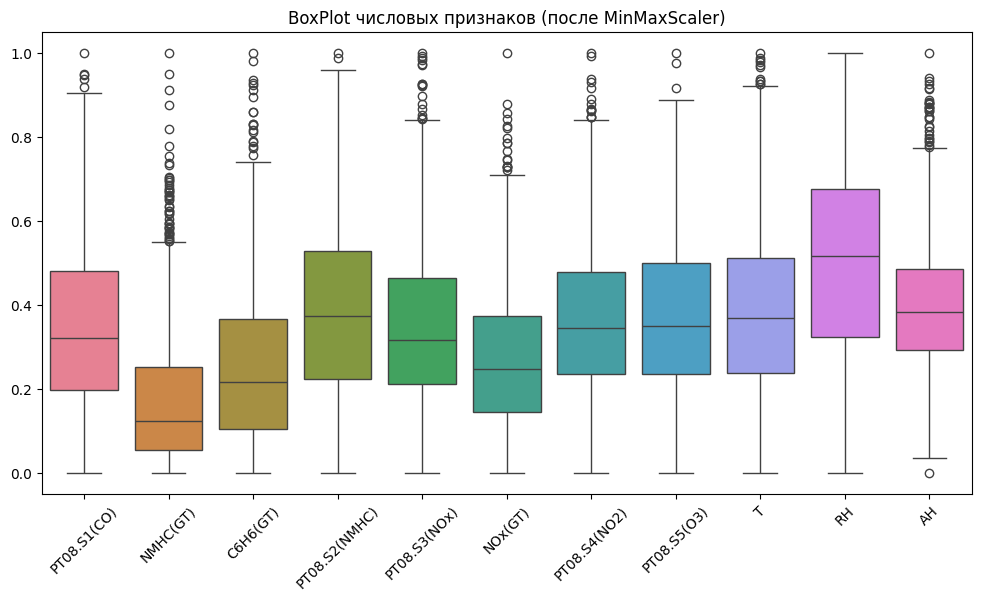

In [136]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_scaled)
plt.title('BoxPlot числовых признаков (после MinMaxScaler)')
plt.xticks(rotation=45)
plt.show()

In [137]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S')
df['Hour'] = df['Time'].dt.hour

df.drop(['Date', 'Time'], axis=1, inplace=True)
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Year,Month,Day,Hour
0,2.6,1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",2004,3,10,18
1,2.0,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",2004,3,10,19
2,2.2,1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",2004,3,10,20
3,2.2,1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",2004,3,10,21
4,1.6,1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",2004,3,10,22


Обучение

In [138]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_scaled_clean = imputer.fit_transform(df_scaled)

df[numeric_cols] = pd.DataFrame(df_scaled_clean, columns=numeric_cols, index=df.index)

print("Пропуски после обработки:", df[numeric_cols].isna().sum().sum())

X = df.drop('CO(GT)', axis=1)
y = df['CO(GT)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

scoring = 'neg_mean_squared_error'

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

models = {
    'LASSO': GridSearchCV(Lasso(), param_grid, cv=5, scoring=scoring, refit=True),
    'RIDGE': GridSearchCV(Ridge(), param_grid, cv=5, scoring=scoring, refit=True)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    if hasattr(model, 'best_params_'):
        print(f"{name} - лучшие параметры: {model.best_params_}")


Пропуски после обработки: 0


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.301e+02, tolerance: 6.340e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.536e+04, tolerance: 5.188e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.323e+03, tolerance: 6.340e

LASSO - лучшие параметры: {'alpha': 0.001}
RIDGE - лучшие параметры: {'alpha': 0.1}


Обоснование выбора refit=True:

После кросс-валидации модель автоматически переобучается на всех обучающих данных с лучшими параметрами.

Это дает готовую модель для предсказаний на тестовых данных.

In [139]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

for name, model in models.items():
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name}: MAE = {mae:.2f}, MSE = {mse:.2f}")

LASSO: MAE = 13.62, MSE = 905.34
RIDGE: MAE = 13.30, MSE = 903.98


In [140]:
from scipy.stats import pearsonr, spearmanr

for name, model in models.items():
    y_pred = model.predict(X_test)
    pearson_r, pearson_p = pearsonr(y_test, y_pred)
    spearman_r, spearman_p = spearmanr(y_test, y_pred)
    print(f"{name}: Pearson r = {pearson_r:.3f} (p-value={pearson_p:.3f})")
    print(f"Spearman rho = {spearman_r:.3f} (p-value={spearman_p:.3f})")

LASSO: Pearson r = 0.274 (p-value=0.000)
      Spearman rho = 0.700 (p-value=0.000)
RIDGE: Pearson r = 0.270 (p-value=0.000)
      Spearman rho = 0.714 (p-value=0.000)


Вывод:

Pearson r ~0.27:

Слабая линейная зависимость.
Низкое значение, несмотря на статистическую значимость (p-value=0.000), говорит о нелинейности данных.

Spearman ρ ~0.7:

Сильная монотонная зависимость. Модель правильно определяет общий тренд (например, рост/падение концентрации CO), но не точные значения.
